In [22]:
#Question 1
# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset from the url address
# Step 3: Assign it to a variable called users
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|', index_col='user_id')

# Step 4: Discover what is the mean age per occupation
Mean_age_occupation = users.groupby('occupation')['age'].mean()

# Create a DataFrame from the mean age per occupation
mean_age_table = pd.DataFrame({'occupation':Mean_age_occupation.index,'Mean Age': Mean_age_occupation.values})
mean_age_table 


,occupation,Mean Age
0,administrator,38.746835
1,artist,31.392857
2,doctor,43.571429
3,educator,42.010526
4,engineer,36.388060
5,entertainment,29.222222
6,executive,38.718750
7,healthcare,41.562500
8,homemaker,32.571429
9,lawyer,36.750000


In [23]:
#Step5. Discover the Male ratio per occupation and sort it from the most to the least
male_ratio_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
male_ratio_occupation['male_ratio'] = male_ratio_occupation['M'] / (male_ratio_occupation['M'] + male_ratio_occupation['F'])
sorted_male_ratio_occupation = male_ratio_occupation.sort_values(by='male_ratio', ascending=False)['male_ratio']

# Create a DataFrame from the sorted male ratio per occupation
sorted_male_ratio_table = pd.DataFrame({'occupation':sorted_male_ratio_occupation.index, 'Male Ratio' : sorted_male_ratio_occupation.values})
sorted_male_ratio_table

,occupation,Male Ratio
0,doctor,1.000000
1,engineer,0.970149
2,technician,0.962963
3,retired,0.928571
4,programmer,0.909091
5,executive,0.906250
6,scientist,0.903226
7,entertainment,0.888889
8,lawyer,0.833333
9,salesman,0.750000


In [44]:
# Step 6. For each occupation, calculate the minimum and maximum ages
min_max_age_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
#min_max_age_occupation
# Create a DataFrame from the min max age occupation
min_max_table = pd.DataFrame({'Occupation':min_max_age_occupation.index,'Min': min_max_age_occupation['min'], 'Max': min_max_age_occupation['max']})
min_max_table.reset_index(drop='true')

,Occupation,Min,Max
0,administrator,21,70
1,artist,19,48
2,doctor,28,64
3,educator,23,63
4,engineer,22,70
5,entertainment,15,50
6,executive,22,69
7,healthcare,22,62
8,homemaker,20,50
9,lawyer,21,53


In [34]:
# Step 7. For each combination of occupation and sex, calculate the mean age
mean_age_occupationandsex = users.groupby(['occupation', 'gender'])['age'].mean()

# Create a DataFrame from the mean age per occupation and sex
mean_age_table = pd.DataFrame({'Mean Age': mean_age_occupationandsex}).reset_index()
mean_age_table

,occupation,gender,Mean Age
0,administrator,F,40.638889
1,administrator,M,37.162791
2,artist,F,30.307692
3,artist,M,32.333333
4,doctor,M,43.571429
5,educator,F,39.115385
6,educator,M,43.101449
7,engineer,F,29.500000
8,engineer,M,36.600000
9,entertainment,F,31.000000


In [46]:
# Step 8. For each occupation, present the percentage of women and men
gender_percentage_occupation = users.groupby(['occupation', 'gender']).size().unstack().fillna(0)
gender_percentage_occupation['percentage_female'] = (gender_percentage_occupation['F'] / (gender_percentage_occupation['M'] + gender_percentage_occupation['F'])) * 100
gender_percentage_occupation['percentage_male'] = (gender_percentage_occupation['M'] / (gender_percentage_occupation['M'] + gender_percentage_occupation['F'])) * 100

# Create a DataFrame from the gender percentage per occupation
gender_percentage_table = gender_percentage_occupation[['percentage_female', 'percentage_male']]
gender_percentage_table

gender,percentage_female,percentage_male
occupation,,
administrator,45.569620,54.430380
artist,46.428571,53.571429
doctor,0.000000,100.000000
educator,27.368421,72.631579
engineer,2.985075,97.014925
entertainment,11.111111,88.888889
executive,9.375000,90.625000
healthcare,68.750000,31.250000
homemaker,85.714286,14.285714


In [53]:
#Question 2
#Step 1. Import the necessary libraries
import pandas as pd
#Step 2. Import the dataset from the url address.and Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12
#Step 4. Select only the Goal column
goals = euro12['Goals']

#Step 5. How many team participated in the Euro2012?
Euro_teams = euro12['Team'].nunique()
Euro_teams

16

In [54]:
#Step 6. What is the number of columns in the dataset?
number_of_columns = euro12.shape[1]
number_of_columns

35

In [55]:
#Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Create a DataFrame for the selected columns
discipline_df = pd.DataFrame(discipline)
discipline_df

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [57]:
#Step 8. Sort the teams by Red Cards, then to Yellow Cards 
sortDiscipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=False)

# Create a DataFrame for the sorted results
sorted_discipline_df = pd.DataFrame(sortDiscipline)
sorted_discipline_df

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [64]:
# Step 9: Calculate the mean Yellow Cards given per Team
mean_yellow_cards = discipline['Yellow Cards'].mean()
mean_yellow_cards

7.4375

In [72]:
# Step 10: Filter teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
teams_more_than_6_goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [73]:
# Step 11: Select the teams that start with G
teams_G = euro12[euro12['Team'].str.startswith('G')]
teams_G

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [76]:
# Step 12: Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
first_7_columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [77]:
# Step 13: Select all columns except the last 3
exclude_last_3_columns = euro12.iloc[:, :-3]
exclude_last_3_columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [78]:
# Step 14: Present only the Shooting Accuracy from England, Italy, and Russia
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
shooting_accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [2]:
#Question 3
# Step 1: Import the necessary libraries

import pandas as pd
import numpy as np

# Step 2: Create 3 different Series
# The first: a random number from 1 to 4
# The second: a random number from 1 to 3
# The third: a random number from 10,000 to 30,000
series_1 = pd.Series(np.random.randint(1, 4, size=100))
series_2 = pd.Series(np.random.randint(1, 3, size=100))
series_3 = pd.Series(np.random.randint(10000, 30000, size=100))

# Step 3: Create a DataFrame by joining the Series by column
df = pd.DataFrame({'bedrs': series_1, 'bathrs': series_2, 'price_sqr_meter': series_3})

# Step 4: Change the name of the columns
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5: Create a one-column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.DataFrame(pd.concat([series_1, series_2, series_3], ignore_index=True))

# Step 6: Check if it goes only until index 99
bigcolumn

# Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)

# check again
bigcolumn


,0
0,3
1,1
2,3
3,3
4,3
...,...
295,22254
296,17041
297,16279
298,29284


In [105]:
#Question 4
#Step 1: Import necessary libraries
import pandas as pd
import numpy as np

#step 2: # Step 2: Import the dataset from the wind.txt file
filepath = r"C:\Users\User\OneDrive - Georgian College\Documents\BDAT 1004 Data Programming\Prolem set 3\wind.txt"
data = pd.read_csv(filepath, delim_whitespace=True, na_values='NaN')

# Step 3: Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1))
data = data.set_index('Date')
data = data.drop(['Yr', 'Mo', 'Dy'], axis=1)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [119]:
# Step 4:Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
def year_fix(x):
    if x.year > 2000:
        return x - pd.DateOffset(years=100)
    return x

data.index = data.index.map(year_fix)
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [107]:
# Step 5: Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data.index = pd.to_datetime(data.index)
data.index = data.index.astype('datetime64[ns]')
data.index

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)

In [108]:
# Step 6: Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
missingvalues_per_location = data.isnull().sum()
missingvalues_per_location

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [109]:
# Step 7:Compute how many non-missing values there are in total.
non_missingvalues = data.notnull().sum().sum()
non_missingvalues

78857

In [110]:
# Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
mean_windspeed = data.mean().mean()
mean_windspeed

10.227982360836938

In [111]:
# Step 9: Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
loc_stats = pd.DataFrame({
    'Min': data.min(),
    'Max': data.max(),
    'Mean': data.mean(),
    'Std': data.std()
})
loc_stats

,Min,Max,Mean,Std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [112]:
# Step 10: Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day
day_stats = pd.DataFrame({
    'Min': data.min(axis=1),
    'Max': data.max(axis=1),
    'Mean': data.mean(axis=1),
    'Std': data.std(axis=1)
})
day_stats

,Min,Max,Mean,Std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [113]:
# Step 11: Find the Average windspeed in January for each location
january_average = data[data.index.month == 1].groupby(data[data.index.month == 1].index.to_period('Y')).mean()
january_average

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1962,14.783871,13.160323,12.591935,7.538065,11.779677,8.720000,14.211935,9.600000,9.670000,11.498710,16.369355,15.661613
1963,14.868387,11.112903,15.121613,6.635806,11.080645,7.835484,12.797419,9.844839,7.841613,9.390000,11.428710,18.822258
1964,12.661290,11.818387,11.741290,6.953548,11.400645,6.865806,9.592903,9.687419,6.947742,9.676774,15.067419,14.145484
1965,15.741613,15.546774,15.274194,8.258387,13.588065,9.251290,13.850968,11.260000,9.899355,11.706129,16.196129,17.888710
1966,15.834839,13.283226,15.136452,8.659355,12.968065,9.163548,12.150000,10.475806,8.750645,10.739677,14.074516,15.554194
1967,13.736129,11.470968,11.537419,6.928065,10.833548,6.730323,9.787419,7.474839,7.627097,10.169032,13.457742,17.124516
1968,14.733226,12.829032,12.294194,7.849032,12.262581,7.133226,12.395806,9.225806,9.415484,9.255161,14.213871,19.095484
1969,12.824839,12.113871,11.403871,6.708710,10.557097,5.926452,9.882903,8.375161,8.378065,9.515484,13.410000,16.957742


In [114]:
# Step 12: Downsample the record to yearly frequency for each location
yearly_frequency = data.resample('Y').mean()
yearly_frequency

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-12-31,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962-12-31,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966-12-31,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967-12-31,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968-12-31,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969-12-31,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [121]:
# Step 13: Downsample the record to a monthly frequency for each location.
monthly_frequency = data.resample('M').mean()
monthly_frequency

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-31,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02-28,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03-31,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09-30,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10-31,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [123]:
# Step 14: Downsample the record to a weekly frequency for each location.
weekly_frquency = data.resample('W').mean()
weekly_frquency

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [125]:
# Step 15: Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
weekly_stats = pd.DataFrame()
weekly_stats['min'] = data.resample('W').min().iloc[:52].min(axis=1)
weekly_stats['max'] = data.resample('W').max().iloc[:52].max(axis=1)
weekly_stats['mean'] = data.resample('W').mean().iloc[:52].mean(axis=1)
weekly_stats['std'] = data.resample('W').std().iloc[:52].std(axis=1)
weekly_stats

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,NaN
1961-01-08,1.79,18.50,9.847659,0.957666
1961-01-15,0.50,20.71,8.353214,0.778587
1961-01-22,1.04,20.79,9.368413,0.930525
1961-01-29,6.04,27.71,16.958095,0.513690
1961-02-05,3.63,24.21,11.800357,1.084578
1961-02-12,8.08,26.38,15.891548,1.032779
1961-02-19,3.42,29.63,13.726825,1.238825
1961-02-26,2.21,25.80,12.604286,0.793856


In [126]:
#Question 5
import pandas as pd

# Step 2: Import the dataset from the url address
# Step 3: Assign it to a variable called chipo
chipo = pd.read_csv(r"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep='\t')

# Step 4:See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [5]:
# Step 5: What is the number of observations in the dataset?
number_of_observations = chipo.shape[0]
number_of_observations

4622

In [6]:
# Step 6: What is the number of columns in the dataset?
num_columns = chipo.shape[1]
num_columns

5

In [7]:
# Step 7: Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [8]:
# Step 8: How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [9]:
# Step 9: Which was the most-ordered item?
most_ordered_item = chipo['item_name'].value_counts().idxmax()
most_ordered_item

'Chicken Bowl'

In [11]:
# Step 10: For the most-ordered item, how many items were ordered?
most_ordered_item_count = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
most_ordered_item_count

761

In [16]:
# Step 11: What was the most ordered item in the choice_description column?
most_ordered_item_choice = chipo['choice_description'].value_counts().idxmax()
most_ordered_item_choice

'[Diet Coke]'

In [17]:
# Step 12: How many items were ordered in total?
total_items_ordered = chipo['quantity'].sum()
total_items_ordered

4972

In [25]:
# Step 13:
# • Turn the item price into a float
# • Check the item price type
# • Create a lambda function and change the type of item price
# • Check the item price type
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo['item_price'].dtype

dtype('float64')

In [26]:
# Step 14: How much was the revenue for the period in the dataset?
revenue = (chipo['quantity'] * chipo['item_price']).sum()
revenue

39237.02

In [27]:
# Step 15: How many orders were made in the period?
number_of_orders = chipo['order_id'].nunique()
number_of_orders

1834

In [29]:
# Step 16: What is the average revenue amount per order?
average_revenue_per_order = revenue / number_of_orders
average_revenue_per_order

21.39423118865867

In [30]:
# Step 17: How many different items are sold?
num_different_items_sold = chipo['item_name'].nunique()
num_different_items_sold

50

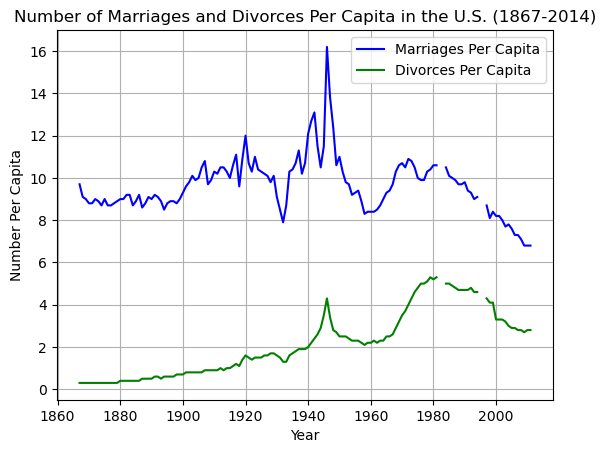

In [118]:
#Question 6

import pandas as pd
import matplotlib.pyplot as plt

us_marriage_divorces = pd.read_csv(r"C:\Users\User\OneDrive - Georgian College\Documents\BDAT 1004 Data Programming\Prolem set 3\us-marriages-divorces-1867-2014.csv")

marriages_per_capita = us_marriage_divorces['Marriages_per_1000'].tolist()
divorces_per_capita = us_marriage_divorces['Divorces_per_1000'].tolist()
year = us_marriage_divorces['Year'].tolist()

plt.plot(year,marriages_per_capita,label='Marriages Per Capita', color='b')
plt.plot(year,divorces_per_capita,label='Divorces Per Capita', color='g')


plt.title('Number of Marriages and Divorces Per Capita in the U.S. (1867-2014)')
plt.xlabel('Year')
plt.ylabel('Number Per Capita')
plt.legend()
plt.grid(True)
plt.show()

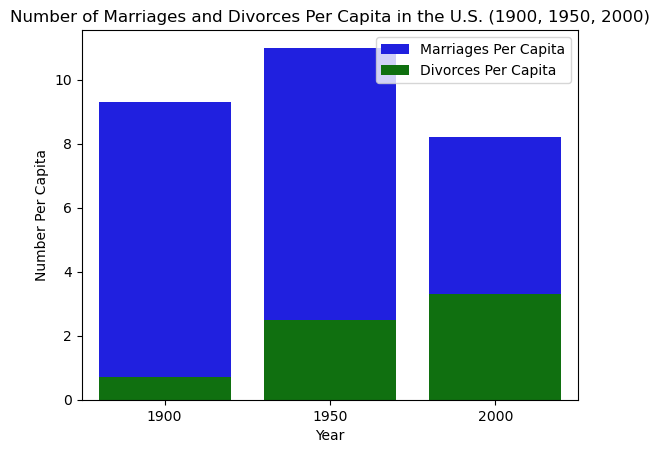

In [60]:
#Question 7

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

marriage_divorces = pd.read_csv(r"C:\Users\User\OneDrive - Georgian College\Documents\BDAT 1004 Data Programming\Prolem set 3\us-marriages-divorces-1867-2014.csv")

selected_years = [1900, 1950, 2000]
stat = marriage_divorces[marriage_divorces['Year'].isin(selected_years)]
marriages_per_capita = stat['Marriages_per_1000'].tolist()
divorces_per_capita = stat['Divorces_per_1000'].tolist()

sns.barplot(data=stat, x=selected_years, y=marriages_per_capita, color='b', label='Marriages Per Capita')
sns.barplot(data=stat, x=selected_years, y=divorces_per_capita, color='g', label='Divorces Per Capita')

plt.title('Number of Marriages and Divorces Per Capita in the U.S. (1900, 1950, 2000)')
plt.xlabel('Year')
plt.ylabel('Number Per Capita')
plt.legend()

plt.show()

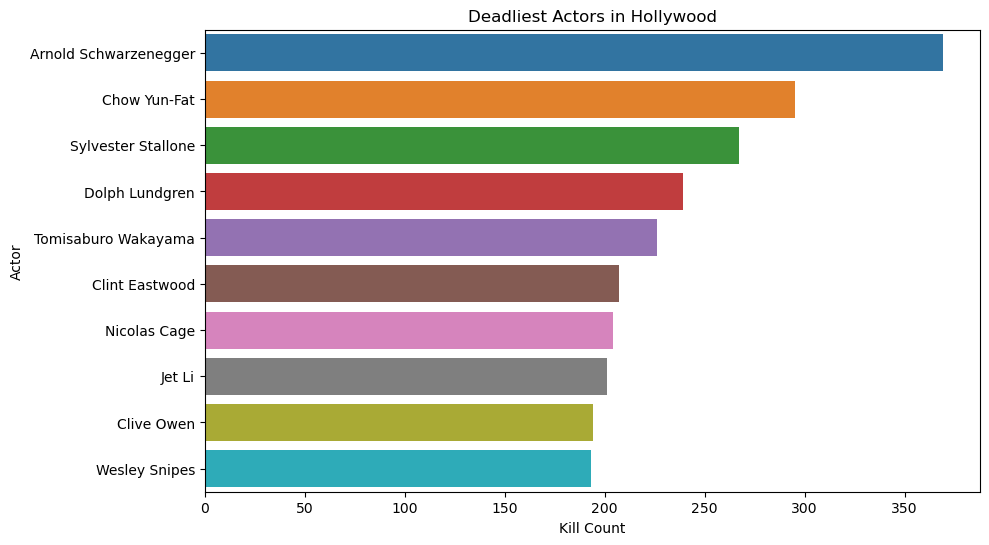

In [59]:
#Question 8
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

actors_kill_count = pd.read_csv(r"C:\Users\User\OneDrive - Georgian College\Documents\BDAT 1004 Data Programming\Prolem set 3\actor_kill_counts.csv")

sort_by_kill_count = actors_kill_count.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Actor', data=sort_by_kill_count)

plt.title('Deadliest Actors in Hollywood')
plt.xlabel('Kill Count')
plt.ylabel('Actor')

plt.show()

In [77]:
#Question 9
import numpy as np
import pandas as pd

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from wordcloud import WordCloud

import matplotlib.pyplot as plt

roman_emperor_reigns = pd.read_csv(r"C:\Users\User\OneDrive - Georgian College\Documents\BDAT 1004 Data Programming\Prolem set 3\roman-emperor-reigns.csv")

# data preparation
assassinated_emperors = roman_emperor_reigns[roman_emperor_reigns['Cause_of_Death'] == 'Assassinated']
assassinated_count = len(assassinated_emperors)
non_assassinated_count = len(roman_emperor_reigns) - assassinated_count

labels = ['Assassinated', 'Not Assassinated']
values = [assassinated_count, non_assassinated_count]

fig = {
    "data": [
        {
            "values": values,
            "labels": labels,
            "domain": {"x": [.2, .5]},
            "name": "Roman Emperors Assassination",
            "hoverinfo": "label+percent+name",
            "type": "pie"
        },
    ],
    "layout": {
        "title": "Fraction of Roman Emperors Assassinated",
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Assassination",
                "x": 0.20,
                "y": 1,
            },
        ]
    }
}
iplot(fig)

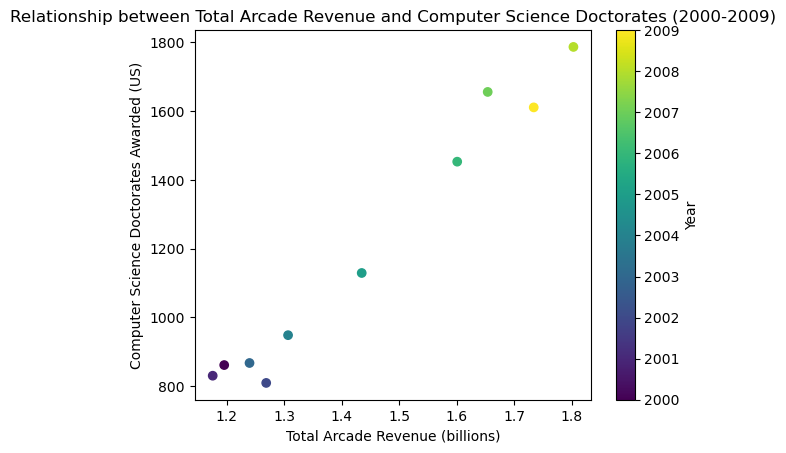

In [81]:
#Question 10
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
arcade = pd.read_csv(r"C:\Users\User\OneDrive - Georgian College\Documents\BDAT 1004 Data Programming\Prolem set 3\arcade-revenue-vs-cs-doctorates.csv")

# Filter the data for the years 2000 to 2009
arcade_filtered = arcade[(arcade['Year'] >= 2000) & (arcade['Year'] <= 2009)]

# Create a scatter plot
scatter = plt.scatter(arcade_filtered['Total Arcade Revenue (billions)'], arcade_filtered['Computer Science Doctorates Awarded (US)'], c=arcade_filtered['Year'], cmap='viridis')

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Total Arcade Revenue and Computer Science Doctorates (2000-2009)')

# Add a colorbar
plt.colorbar(scatter, label='Year')

plt.show()
